In [1]:
import pandas as pd


plain = pd.read_csv("results/plain.csv")
native = pd.read_csv("results/native.csv")
nodeps = pd.read_csv("results/native_deps.csv")
invsum = pd.read_csv("results/native_deps_invsum.csv")
ur2 = pd.read_csv("results/native_deps_invsum_ur2.csv")
ur4 = pd.read_csv("results/native_deps_invsum_ur4.csv")
ur2fm = pd.read_csv("results/native_deps_invsum_ur2_fm.csv")
ur4fm = pd.read_csv("results/native_deps_invsum_ur4_fm.csv")

df = plain
df.rename(columns={"time": "plain"}, inplace=True)
df["plain"] = df["plain"] * 1e6
df["native"] = native["time"] * 1e6
df["nodeps"] = nodeps["time"] * 1e6
df["invsum"] = invsum["time"] * 1e6
df["ur2"] = ur2["time"] * 1e6
df["ur4"] = ur4["time"] * 1e6
df["ur2fm"] = ur2fm["time"] * 1e6
df["ur4fm"] = ur4fm["time"] * 1e6
df

,elements,plain,native,nodeps,invsum,ur2,ur4,ur2fm,ur4fm
0,128,6.75334,6.49826,6.21408,6.15056,5.99824,6.97736,5.76416,6.12372
1,256,8.03948,8.08802,8.05210,7.72688,7.61054,7.66972,6.61454,6.47902
2,512,11.35570,11.26710,9.98422,11.41160,11.07550,9.80634,7.89508,7.79070
3,1024,16.42310,15.79350,15.78280,18.04180,16.69200,15.15740,11.74760,10.74690
4,2048,27.56460,28.03550,29.16890,28.55750,27.08800,25.67750,15.89680,15.19890
5,4096,49.09190,49.52620,50.16280,51.07320,48.24110,46.66290,25.24430,22.79660
6,8192,93.25750,95.08950,91.29580,94.51940,88.53550,86.88280,37.45540,38.81960
7,16384,186.93200,181.87900,185.88000,185.66400,173.38900,170.86300,70.82670,68.21260


In [2]:
# df["native_su"] = df["plain"] / df["native"]
# print(df.to_latex(header=True, index=False, float_format="%.4f"))
# df

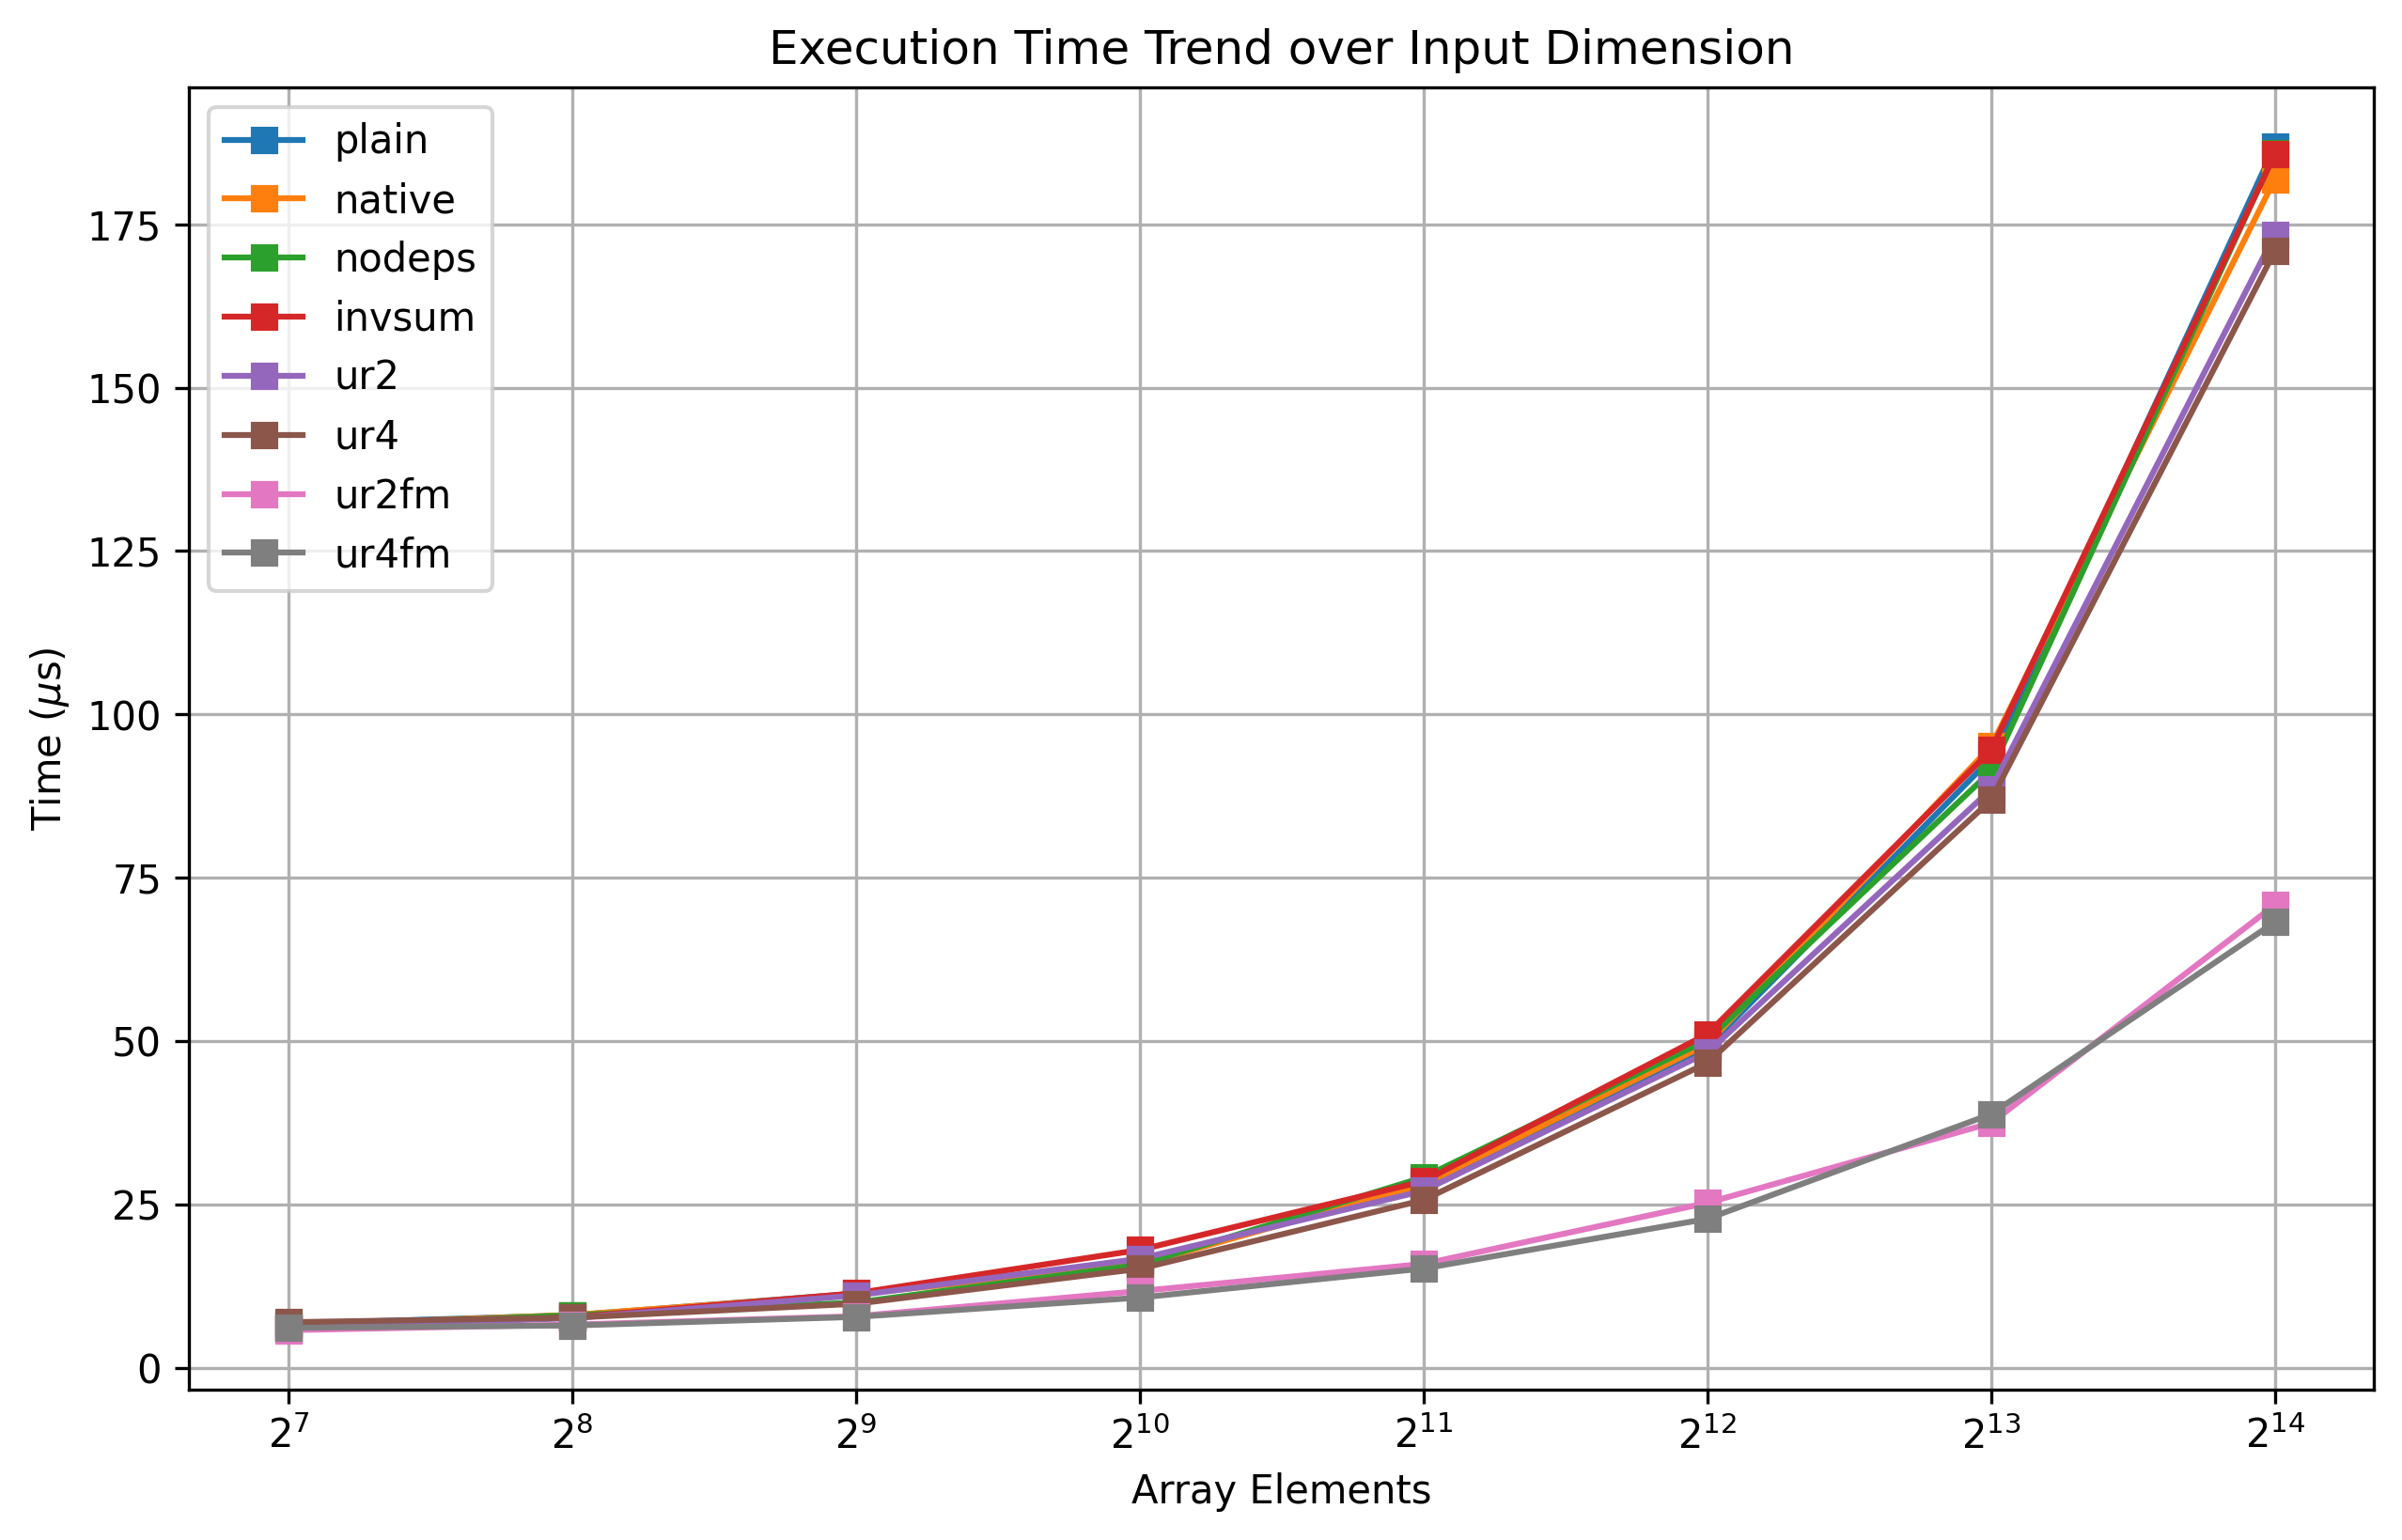

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6), dpi=300)
plt.title("Execution Time Trend over Input Dimension")

labels = [c for c in df.columns if c != "elements"]
for label in labels:
    plt.plot(df["elements"], df[label], marker="s", label=label)

plt.xlabel("Array Elements")
plt.ylabel(r"Time ($\mu$s)")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("time.svg")
plt.show()

In [4]:
speedup_df = df.copy()
for c in speedup_df.columns:
    if c != "elements":
        speedup_df[c] = df["plain"] / df[c]

speedup_df

,elements,plain,native,nodeps,invsum,ur2,ur4,ur2fm,ur4fm
0,128,1.0,1.039254,1.086780,1.098004,1.125887,0.967893,1.171609,1.102817
1,256,1.0,0.993999,0.998433,1.040456,1.056361,1.048210,1.215425,1.240848
2,512,1.0,1.007864,1.137365,0.995101,1.025299,1.157996,1.438326,1.457597
3,1024,1.0,1.039865,1.040569,0.910281,0.983890,1.083504,1.397996,1.528171
4,2048,1.0,0.983203,0.945000,0.965232,1.017595,1.073492,1.733972,1.813592
5,4096,1.0,0.991231,0.978652,0.961207,1.017636,1.052054,1.944673,2.153475
6,8192,1.0,0.980734,1.021487,0.986649,1.053335,1.073371,2.489828,2.402330
7,16384,1.0,1.027782,1.005660,1.006830,1.078108,1.094046,2.639287,2.740432


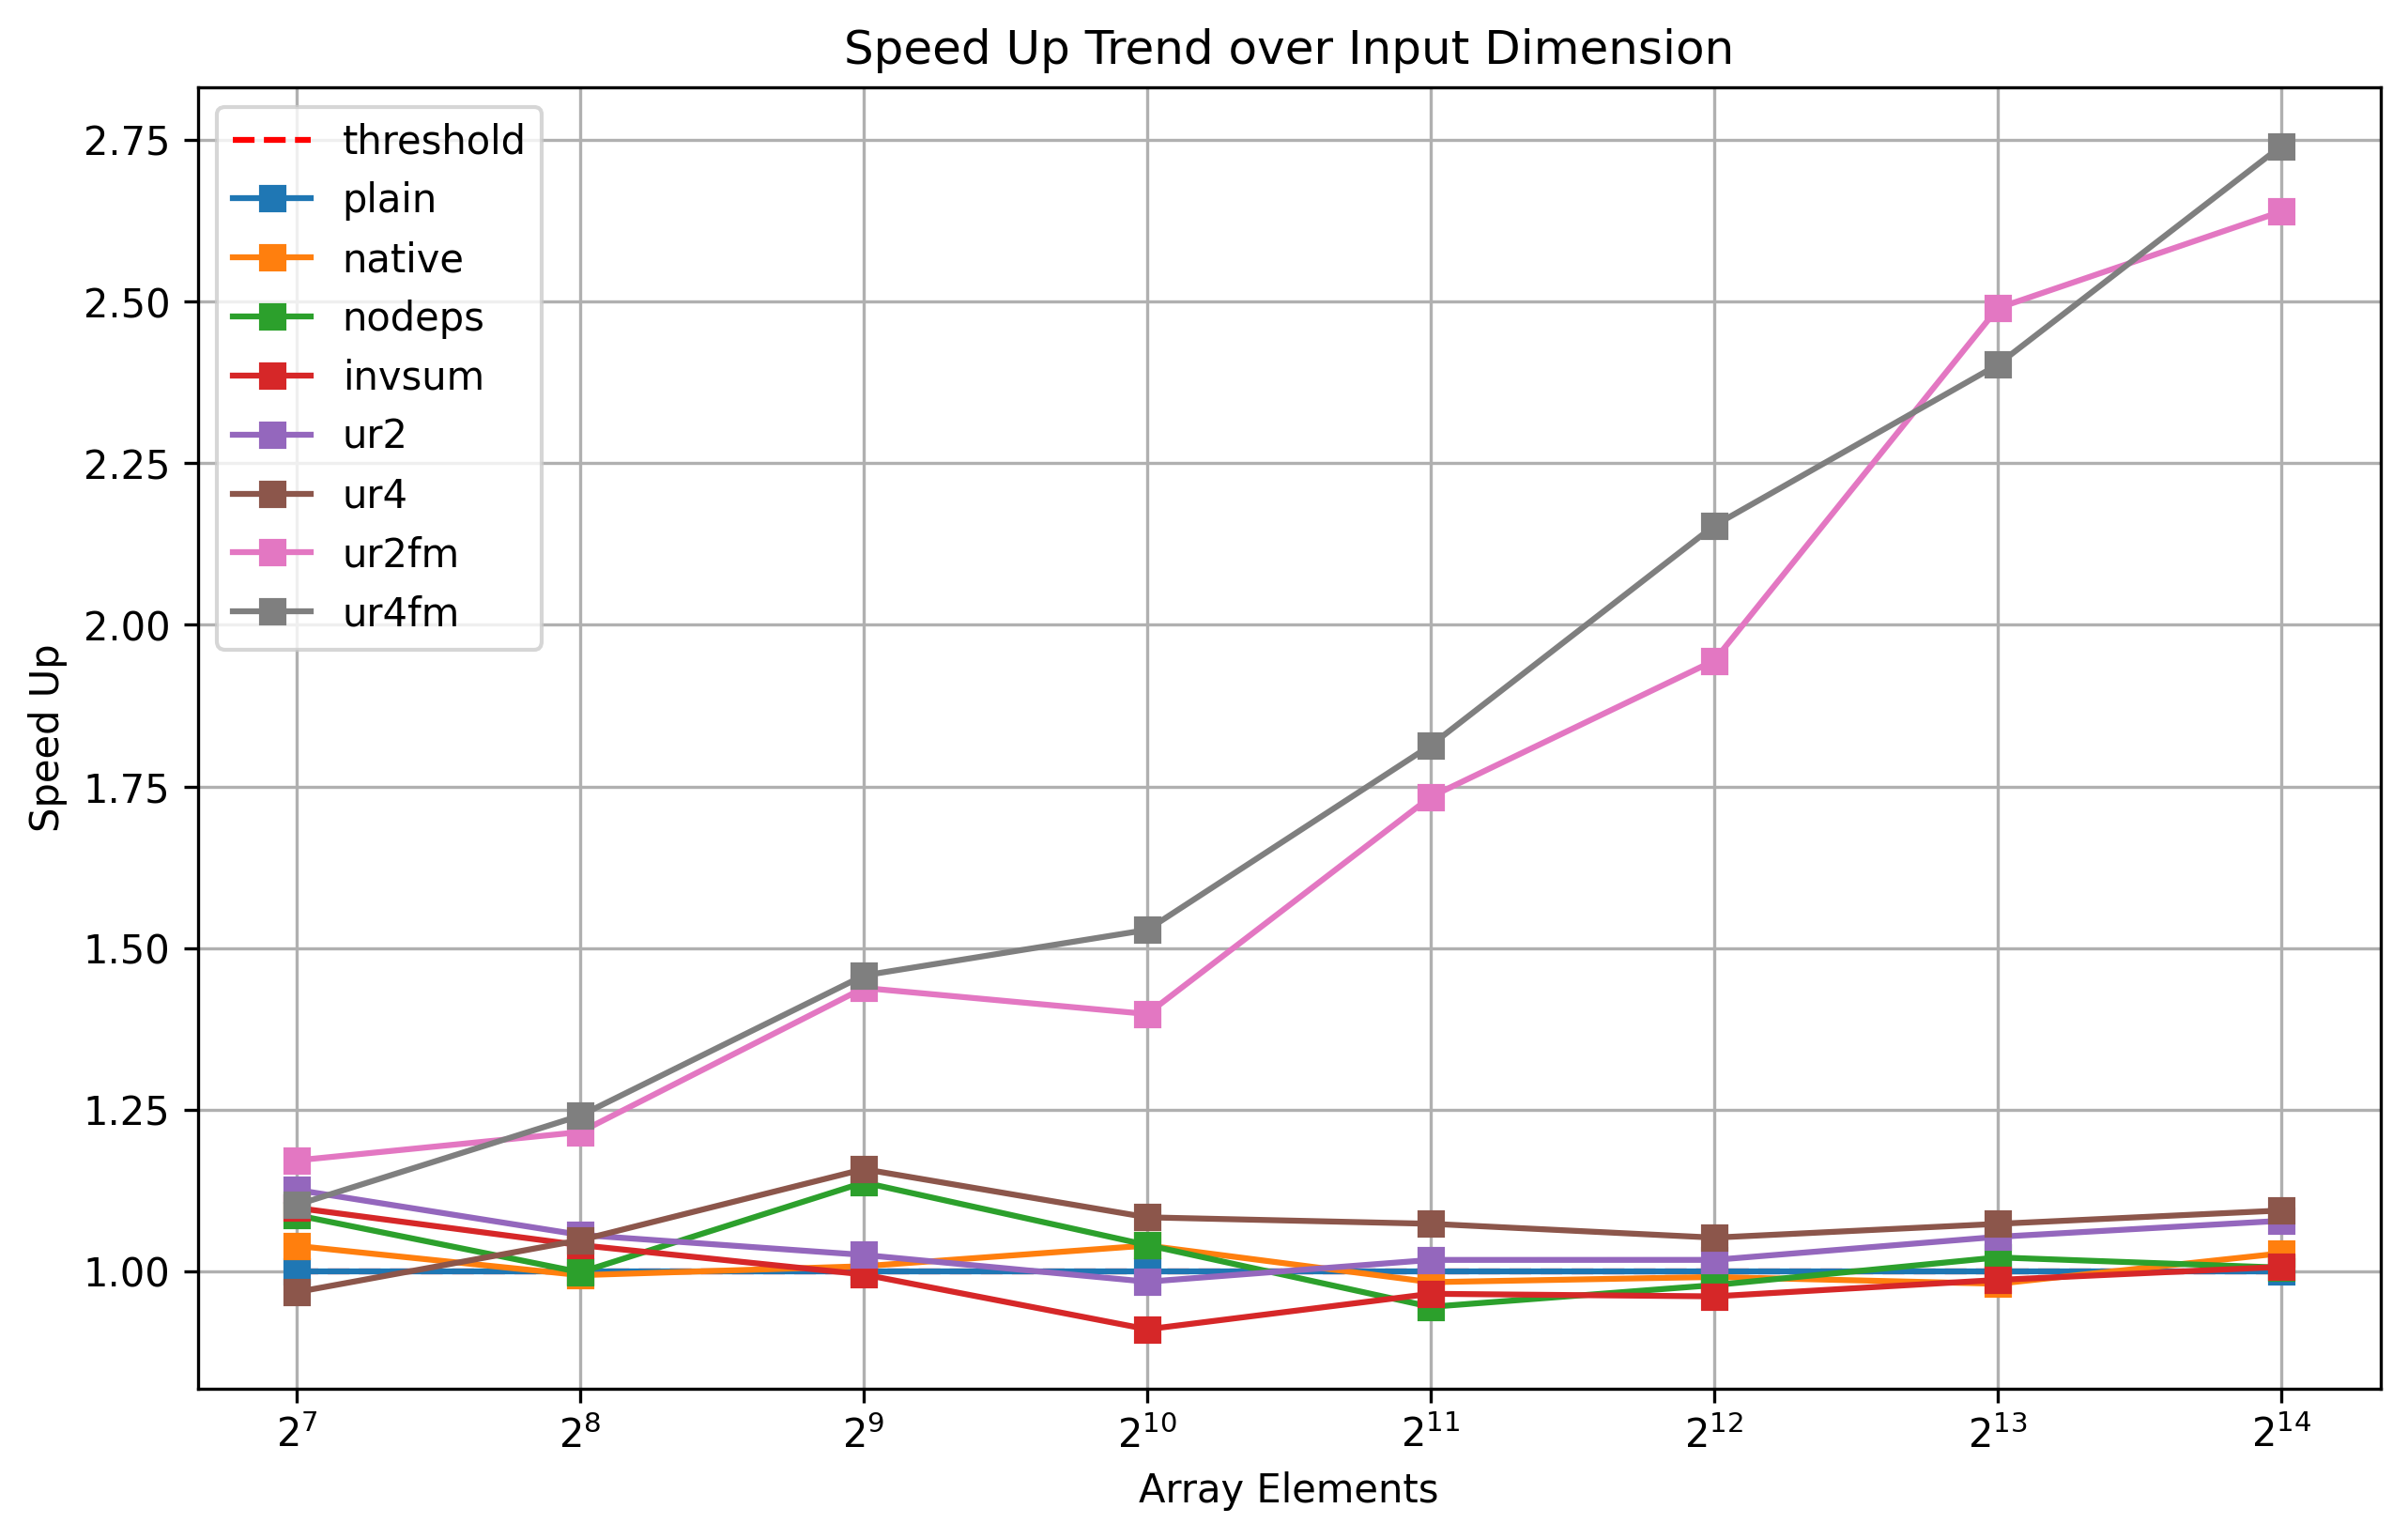

In [5]:
plt.figure(figsize=(10, 6), dpi=300)
plt.title("Speed Up Trend over Input Dimension")

# threshold of good speed up
plt.plot([128, 16384], [1.0, 1.0], "r--", label="threshold")

for label in labels:
    plt.plot(speedup_df["elements"], speedup_df[label], marker="s", label=label)

plt.xlabel("Array Elements")
plt.ylabel("Speed Up")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("speed_up.svg")
plt.show()